In [35]:
#Import Libraries
 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [36]:
#Mount Google Drive
 
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [37]:
#Load Data

abi=pd.read_csv('/drive/My Drive/Grip/globalterrorismdb.csv',encoding="ISO-8859-1")
abi.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Aut

In [38]:
abi.shape

(181691, 135)

In [39]:
abi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [40]:
abi.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

In [41]:
abi.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [42]:
abi.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Targeted','nkill':'No.of.Kill',
                       'nwound':'No.of.Wounded','gname':'Gang','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [43]:
abi=abi[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','No.of.Kill',
               'No.of.Wounded','Targeted','Gang','Target_type','Weapon_type','Motive']]

In [44]:
abi.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,No.of.Kill,No.of.Wounded,Targeted,Gang,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [45]:
abi.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
state               421
Region                0
city                434
latitude           4556
longitude          4557
AttackType            0
No.of.Kill        10313
No.of.Wounded     16311
Targeted            636
Gang                  0
Target_type           0
Weapon_type           0
Motive           131130
dtype: int64

In [46]:
abi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   state          181270 non-null  object 
 5   Region         181691 non-null  object 
 6   city           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   AttackType     181691 non-null  object 
 10  No.of.Kill     171378 non-null  float64
 11  No.of.Wounded  165380 non-null  float64
 12  Targeted       181055 non-null  object 
 13  Gang           181691 non-null  object 
 14  Target_type    181691 non-null  object 
 15  Weapon_type    181691 non-null  object 
 16  Motive         50561 non-null   object 
dtypes: float64(4), int64(3), obje

In [47]:
#Most Attacked Country

print("Most Attacked Country:",abi["Country"].value_counts().idxmax())

Most Attacked Country: Iraq


In [48]:
#Most Attacked City

print("Most Attacked City:",abi["city"].value_counts().index[1])

Most Attacked City: Baghdad


In [49]:
#Most Attacked Region

print("Most Attacked Region:",abi["Region"].value_counts().idxmax())

Most Attacked Region: Middle East & North Africa


In [50]:
#Most Attacked Gang

print("Most Attacked Gang:",abi['Gang'].value_counts().index[1])

Most Attacked Gang: Taliban


In [51]:
killData = abi.loc[:,'No.of.Kill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [52]:

countryData = abi.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [53]:

countryKillFormatData = countryKillData.pivot_table(columns='Country', values='No.of.Kill', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
No.of.Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,...,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


Text(0.5, 1.0, 'Attack_of_Years')

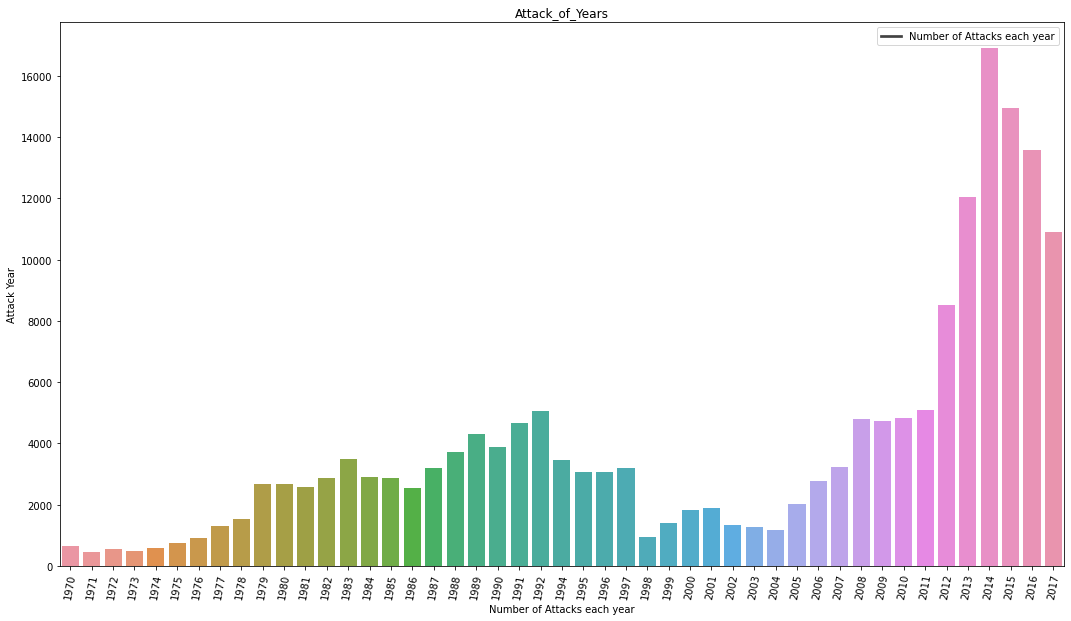

In [54]:
m= abi['Year'].value_counts(dropna = False).sort_index()
n = abi['Year'].unique()
plt.figure(figsize = (18,10))
sns.barplot(x = n,y =m)
plt.xticks(rotation = 80)
plt.ylabel('Attack Year')
plt.legend(labels = ['Number of Attacks each year'])
plt.xlabel('Number of Attacks each year')
plt.title('Attack_of_Years')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


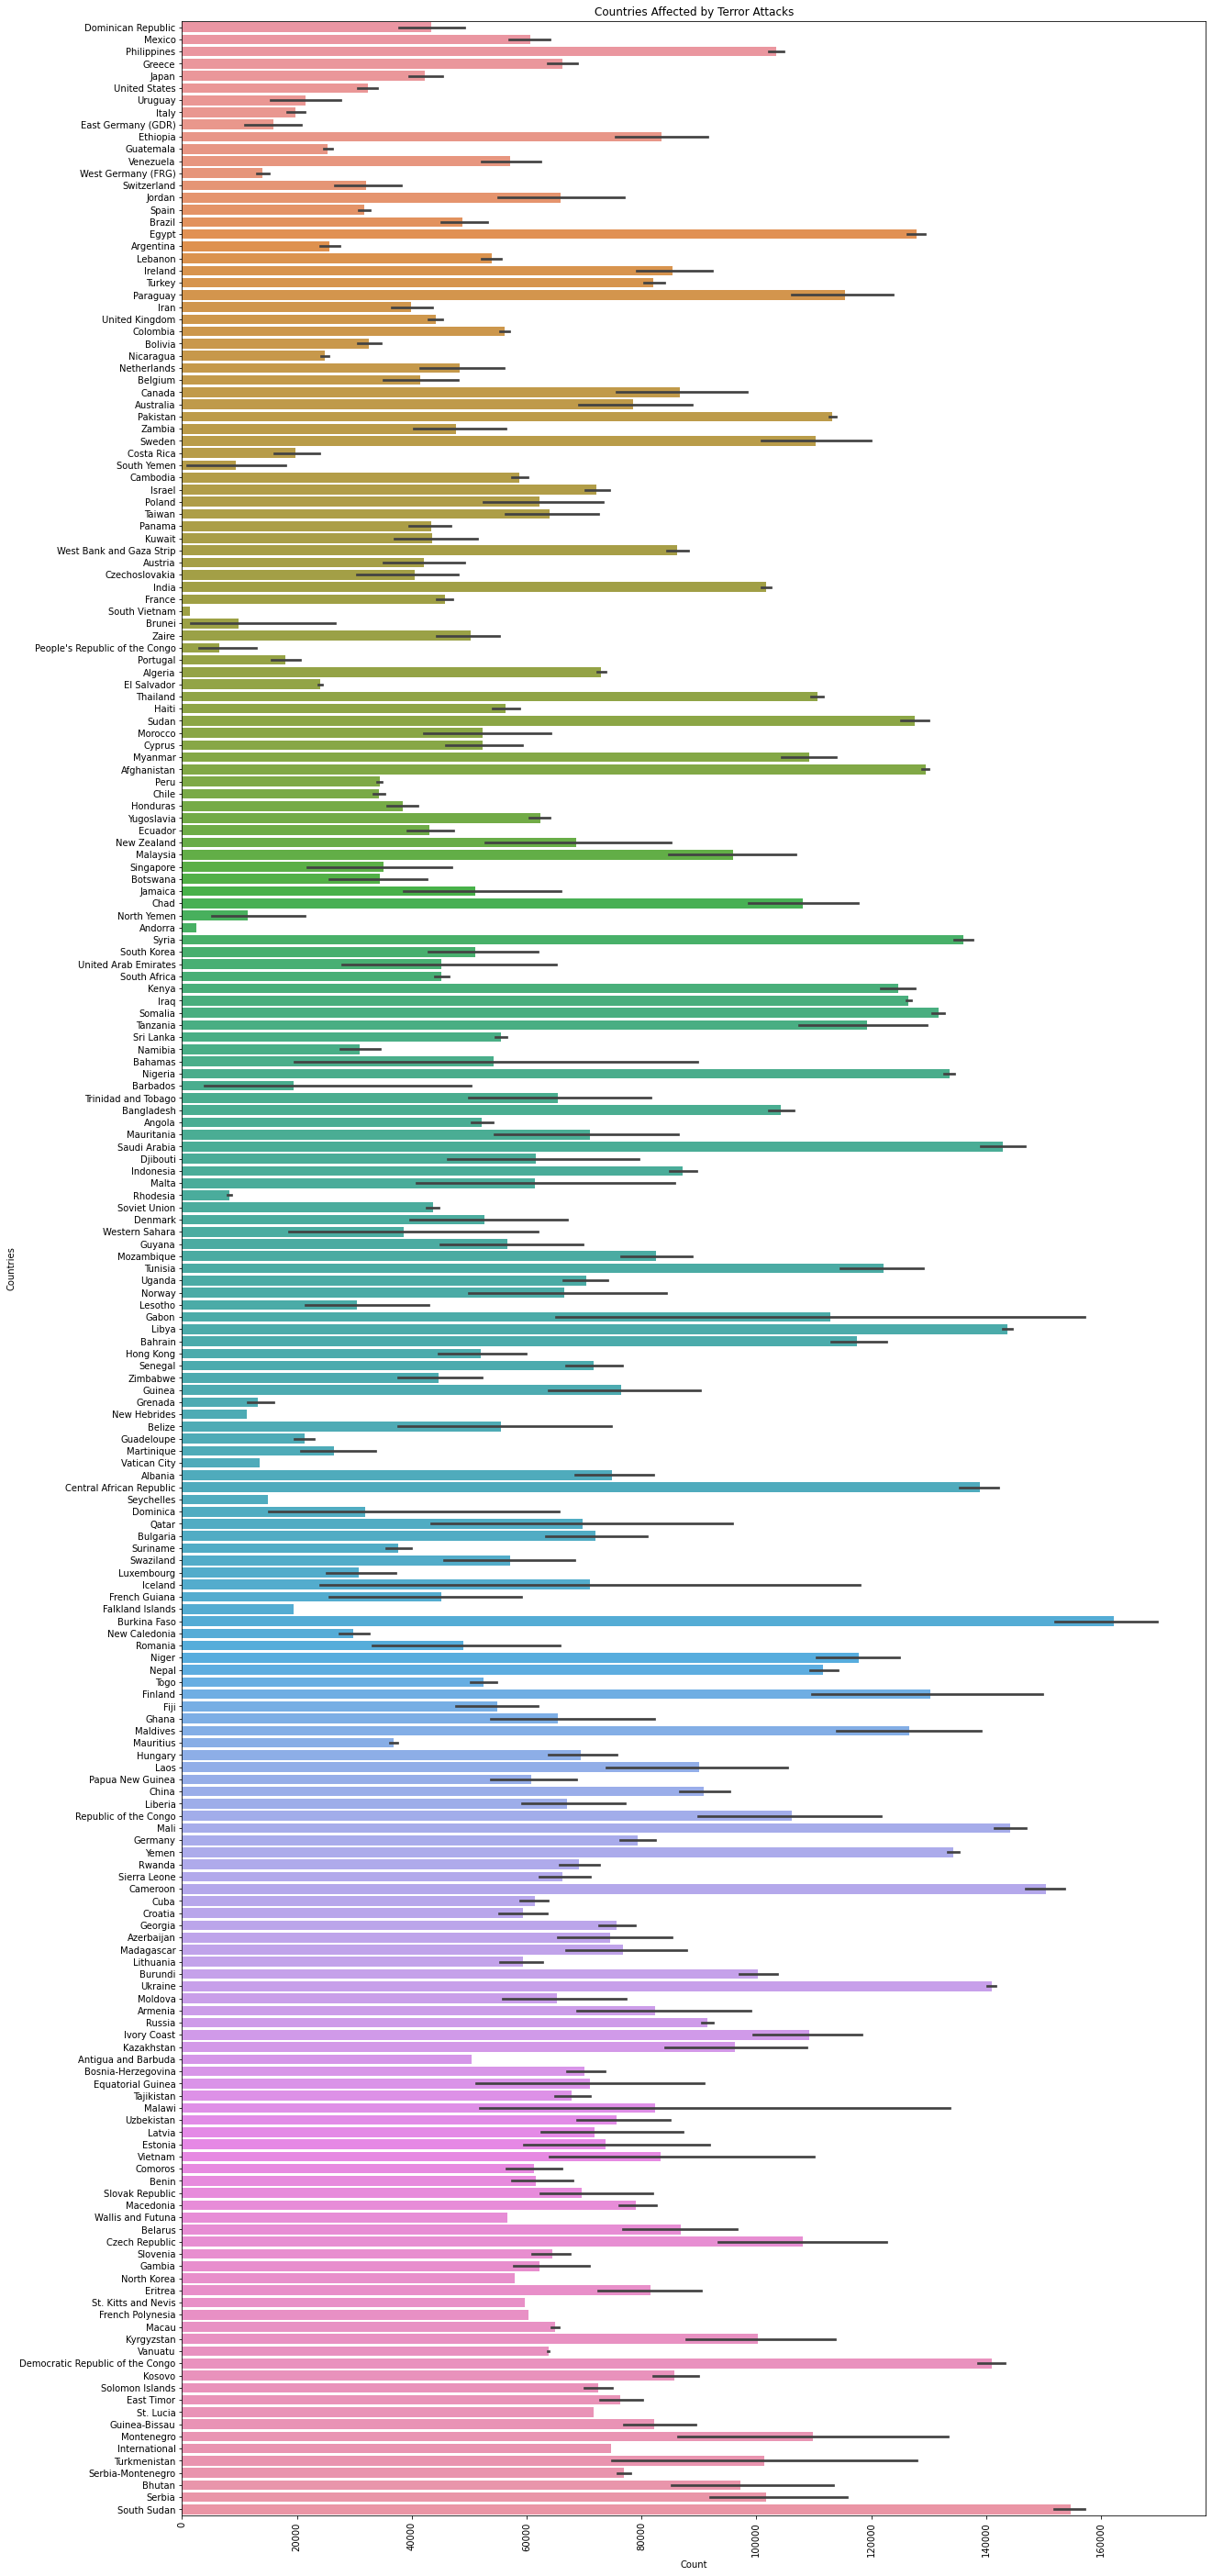

In [55]:
plt.subplots(figsize=(20,50))
sns.barplot(abi['Country'].index,abi['Country'].values)
plt.title('Countries Affected by Terror Attacks')
plt.ylabel('Countries')
plt.xlabel('Count')
plt.xticks(rotation= 90)
plt.show()

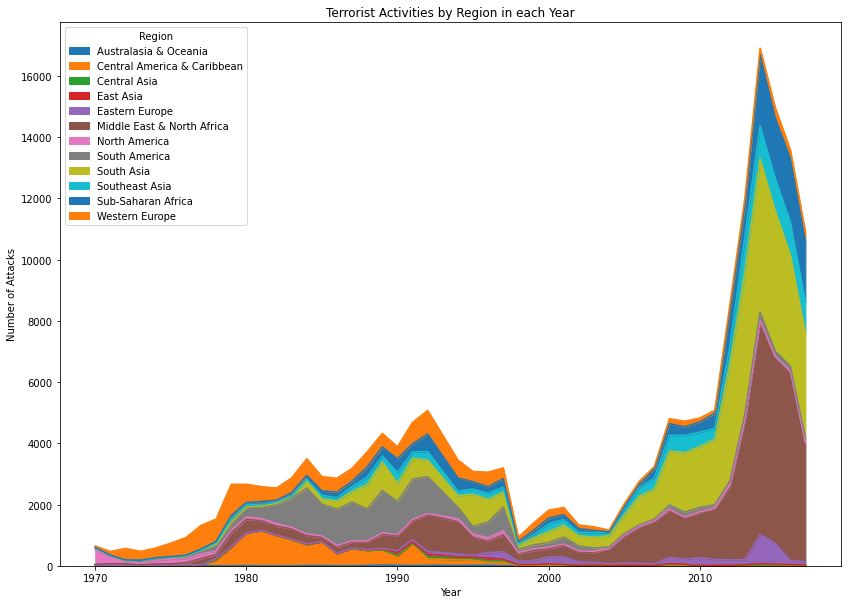

In [56]:
pd.crosstab(abi.Year, abi.Region).plot(kind="area",figsize=(14,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [57]:
 
abi.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


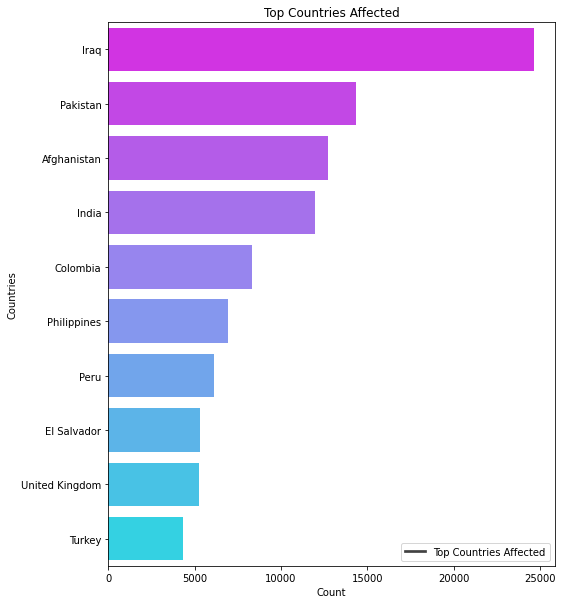

In [58]:

plt.subplots(figsize=(8,10))
sns.barplot(abi['Country'].value_counts()[:10].values,abi['Country'].value_counts()[:10].index,palette='cool_r')
plt.title('Top Countries Affected')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.legend(labels = ['Top Countries Affected'])
plt.xticks(rotation= 0)
plt.show()

In [59]:
abi.Gang.value_counts()[1:5]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Name: Gang, dtype: int64

In [60]:
GangMost1 = abi[abi.Gang.isin(['Taliban'])]
GangMost1.Country.unique()

array(['Afghanistan', 'Pakistan', 'Turkmenistan'], dtype=object)

In [61]:
GangMost1.Region.unique()

array(['South Asia', 'Central Asia'], dtype=object)

In [62]:
GangMost1.city.unique()

array(['Unknown', 'Kandahar', 'Kabul', ..., 'Ibrahim Khel',
       'Pad Khwabi Shanah', 'Hayatah'], dtype=object)

In [63]:
GangMost2 = abi[abi.Gang.isin(['Islamic State of Iraq and the Levant (ISIL)'])]
GangMost2.Country.unique()

array(['Syria', 'Iraq', 'Turkey', 'Tunisia', 'Lebanon', 'Israel',
       'Belgium', 'Egypt', 'Libya', 'Saudi Arabia',
       'West Bank and Gaza Strip', 'France', 'Bahrain', 'Jordan',
       'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [64]:
GangMost2.Region.unique()

array(['Middle East & North Africa', 'Western Europe',
       'Sub-Saharan Africa', 'Southeast Asia', 'Eastern Europe',
       'Central Asia', 'Australasia & Oceania'], dtype=object)

In [65]:
GangMost2.city.unique()

array(['Atmeh', 'Baghdad', 'Latifiyah', 'Mahmudiyah', 'Samarra',
       'Reyhanli', 'Mosul', 'Unknown', 'Madain', 'Jisr Diyala',
       'Saba al-Bor', 'Tal Afar', 'Taji', 'Karma', 'Al-Jadidah',
       'Himreen', 'Al-Adheim', 'Jabalah', 'Kut', 'Basra', 'Nasiriyah',
       'Najaf', 'Tuz Khormato', 'Mahawil', 'Arbil', 'Shirqat', 'Fallujah',
       'Hadhar', 'Athba', 'Nahrawan', 'Tikrit', 'Dujail', 'Sabboura',
       'Muqdadiyah', 'Baqubah', 'Abu Ghraib', 'Amarah', 'Samawah',
       'Jurf al-Sakhar', 'Karbala', 'Musayyib', 'Baiji', 'Sulayman Beg',
       'Tunis', 'Damascus', 'Rabia', 'Anah', 'Yathrib',
       'Amiriyat Al-Fallujah', 'Raqqah', 'Qamishli', 'Aleppo',
       'Mannagh Air Base', 'Husseiniyah', 'Al-Zubeidiyah', 'Kirkuk',
       'Al-Madaen', 'Tarmiyah', 'Sejou', 'Hamah', 'Hillah',
       'Iskandariyah', 'Al-Debis', 'Buhriz', 'Tal Abyad', 'Hawijah',
       'Qabak', 'Hawijah district', 'Saraqib', 'Mandali', 'Abu Sayda',
       'Alam', 'Diwaniyah', 'Nabak', 'Deir Attiyeh', 'Siniyah'

In [66]:
GangMost3 = abi[abi.Gang.isin(['Shining Path (SL)'])]
GangMost3.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico'],
      dtype=object)

In [67]:
GangMost3.Region.unique()

array(['South America', 'North America'], dtype=object)

In [68]:
GangMost3.city.unique()

array(['Ayacucho', 'Uchuraccay', 'Huaraz', 'Tarma', 'Talma', 'Cusco',
       'Cusco district', 'Huancavelica district', 'Chilca',
       'La Voz de Ayachucho', 'Mujillo', 'Lima', 'Unknown',
       'Huancavelica', 'Paipa', 'Huancayo', 'Sicuani', 'Acos District',
       'Yauli', 'Cutervo', 'Chimbote', 'Iquitos', 'Trujillo',
       'Sicuani district', 'Lurigancho', 'Ilo', 'Arequipa',
       'Villa Maria del Triunfo', 'Chiclayo', 'ILO', 'Cajamarca',
       'Villa El Salvador', 'Huanta', 'Quinua', 'Tacna', 'Mantaro',
       'Cerro de Pasco', 'Huacho', 'Huancayo district', 'Abancay',
       'Vinchos', 'Vivichos', 'ICA', 'Huarochiri', 'Cachi-Cachi',
       'Quillabamba', 'Azangaro', 'Chunta', 'Oyon',
       'Vilcashuaman district', 'Vilcashuaman', 'Marcabal', 'Concepcion',
       'Chumbes', 'Cajamarquilla', 'Jauja', 'Huambalpa', 'Oroya',
       'Chupaca', 'Tambo', 'Acos Vinchos', 'Chacari', 'Ayacucho district',
       'San Martin de Paras district', 'Jaen', 'Sequeslambra',
       'Chaupimarca

### **Getting Top 3 Gang Names in the World,Checking the Attacked Region of the Top 3 Gang.**



---


Gang1= ['South Asia', 'Central Asia']

Gang2=['Middle East & North Africa', 'Western Europe','Sub-Saharan Africa', 'Southeast Asia', 'Eastern Europe','Central Asia', 'Australasia & Oceania']

Gang3=['South America', 'North America']       

In [69]:

attackData = abi.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [70]:

attacktypeKill = typeKillData.pivot_table(columns='AttackType', values='No.of.Kill', aggfunc='sum')
attacktypeKill

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
No.of.Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


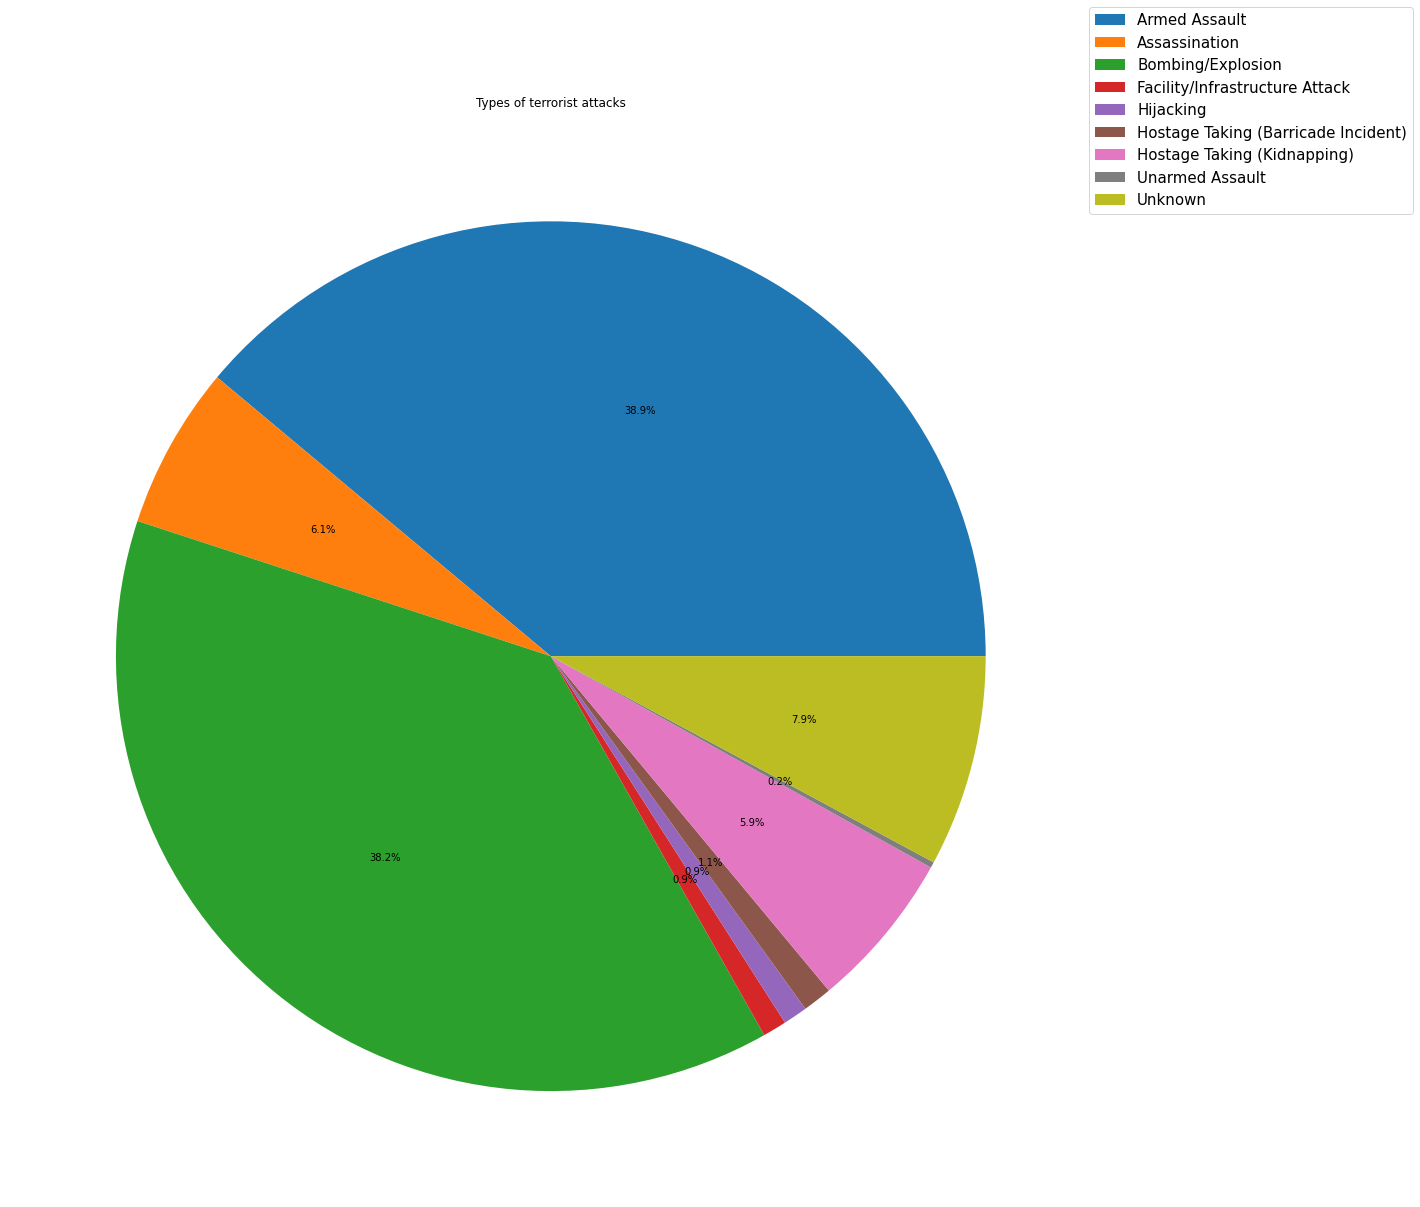

In [71]:
labels = attacktypeKill.columns.tolist() # convert line to list
transpoze = attacktypeKill.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=360, autopct='%.1f%%')
plt.title('Types of terrorist attacks')
plt.legend(labels, loc='lower right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Most Attack Type:  Armed Assault,Bombing/Explosion, Assassination

Most Attacking Gang: Taliban, Islamic State of Iraq and the Levant (ISIL) & Shining Path (SL)

Taliban: The Taliban are a movement of religious students (talib) from the Pashtun areas of eastern and southern Afghanistan who were educated in traditional Islamic schools in Pakistan.

ISIL:a militant group and former unrecognized proto-state that follows a Salafi jihadist doctrine.

Shining Path:is a guerrilla rebel organization in Peru. ... They launched a campaign of bombings, assassinations and other guerrilla attacks against the state throughout the country


### **CONCLUSION:**

Top Attacked Region: Middle East & North Africa( On Basis of Gang Attack, Both Taliban & ISIL Attacked this Region).
 
 
---
Top City Attacked: Baghdad( Capital of Iraq)
 
---
 
Top Affected Countries: Iraq, Afghanistan, Pakistan, India, Colombia
 
 
---